In [2]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [3]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'absth',
            'wgt',
            'planck_wgt_flux']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [4]:
analysis = scripts.Analysis()

In [5]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_30',
                          'g_descending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_10',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.7__all.7',
                          'bigsum',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [6]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_30',
                          'g_descending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_10',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.7__all.7',
                          'bigsum',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [8]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 30 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [9]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [10]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [11]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [12]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 10

nband = 330

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_1 = 1.

temperature_reference_1 = 250.

pressure_reference_2 = 200.

temperature_reference_2 = 250.

ighigh = 10

ng = 30

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /30 * .7/

planck_wgt_flux = 2

include 'mls75.pro'


In [13]:
fig.display_hrefanchor()

In [14]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [15]:
table_dgdgs.display_hrefanchor()

In [16]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [17]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

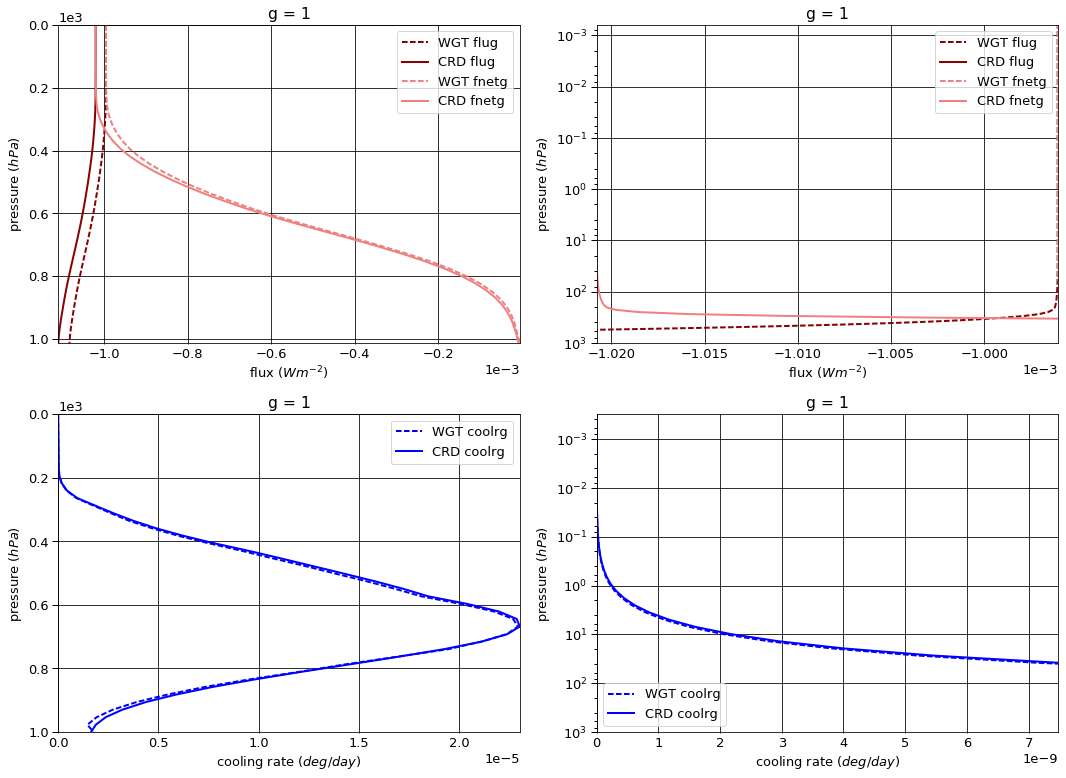

# Figure: flux, cooling rate g-group 2

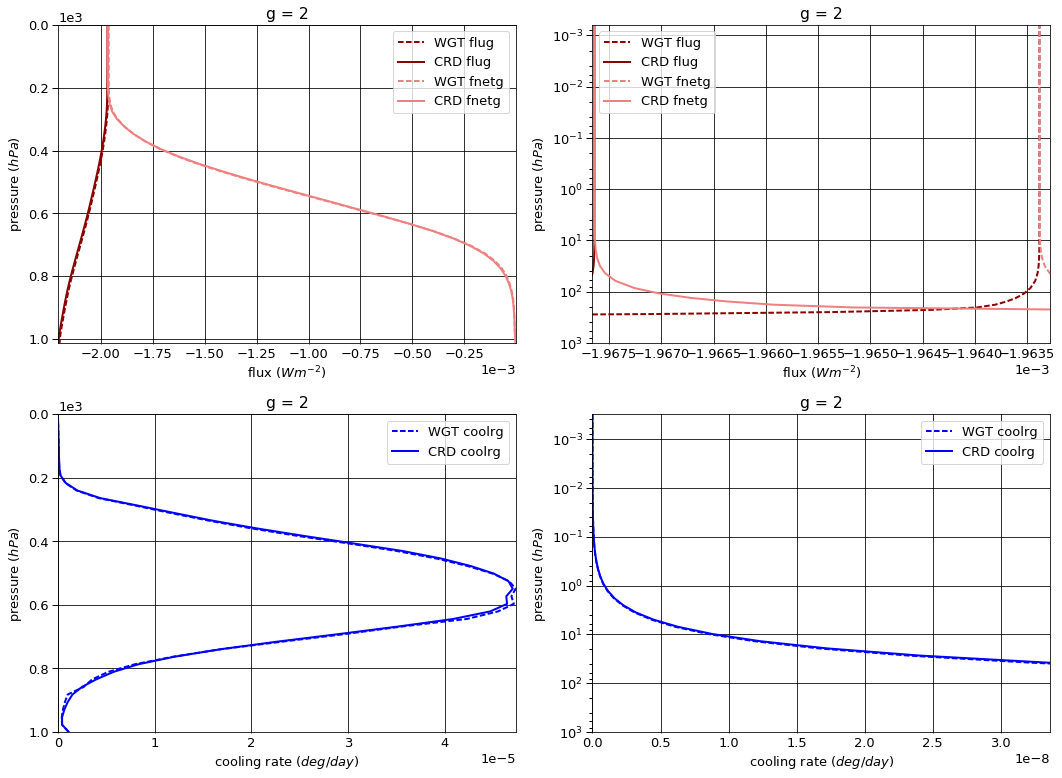

# Figure: flux, cooling rate g-group 3

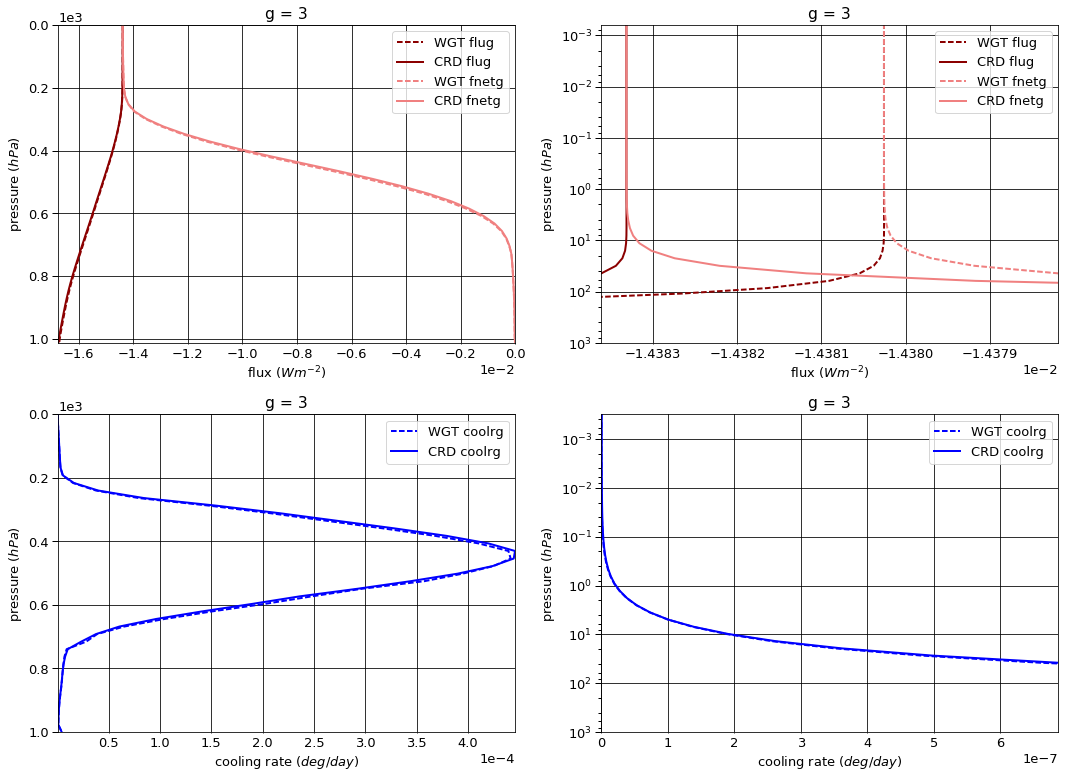

# Figure: flux, cooling rate g-group 4

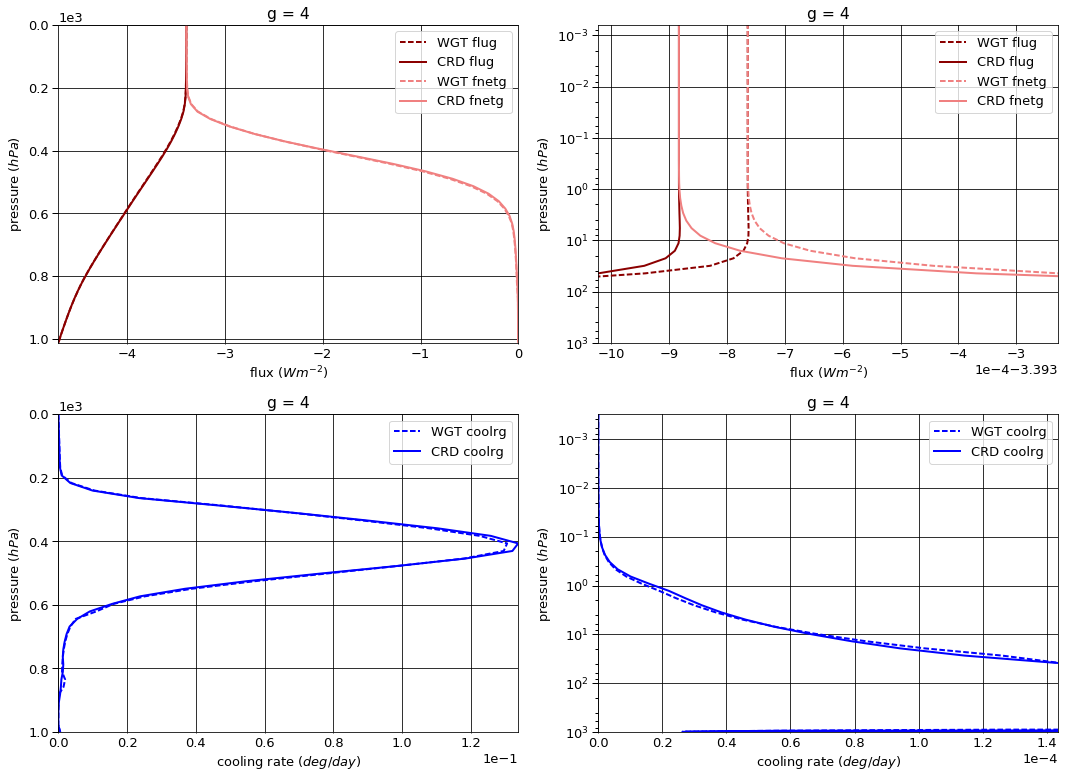

# Figure: flux, cooling rate g-group 5

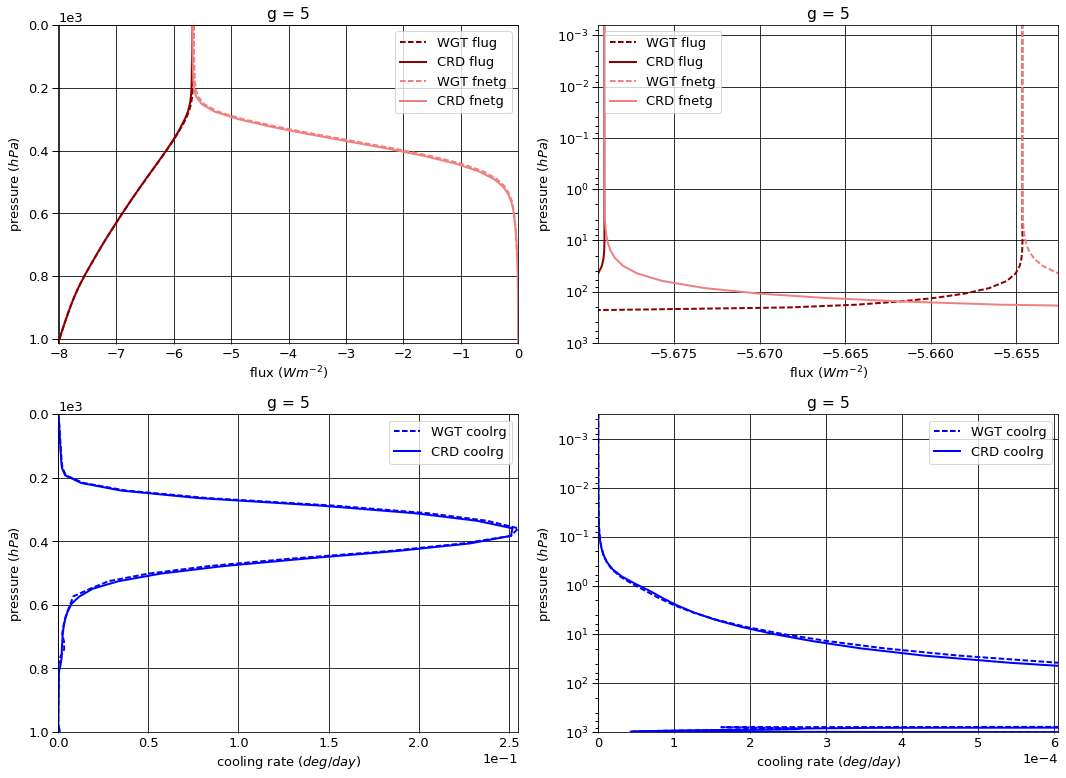

# Figure: flux, cooling rate g-group 6

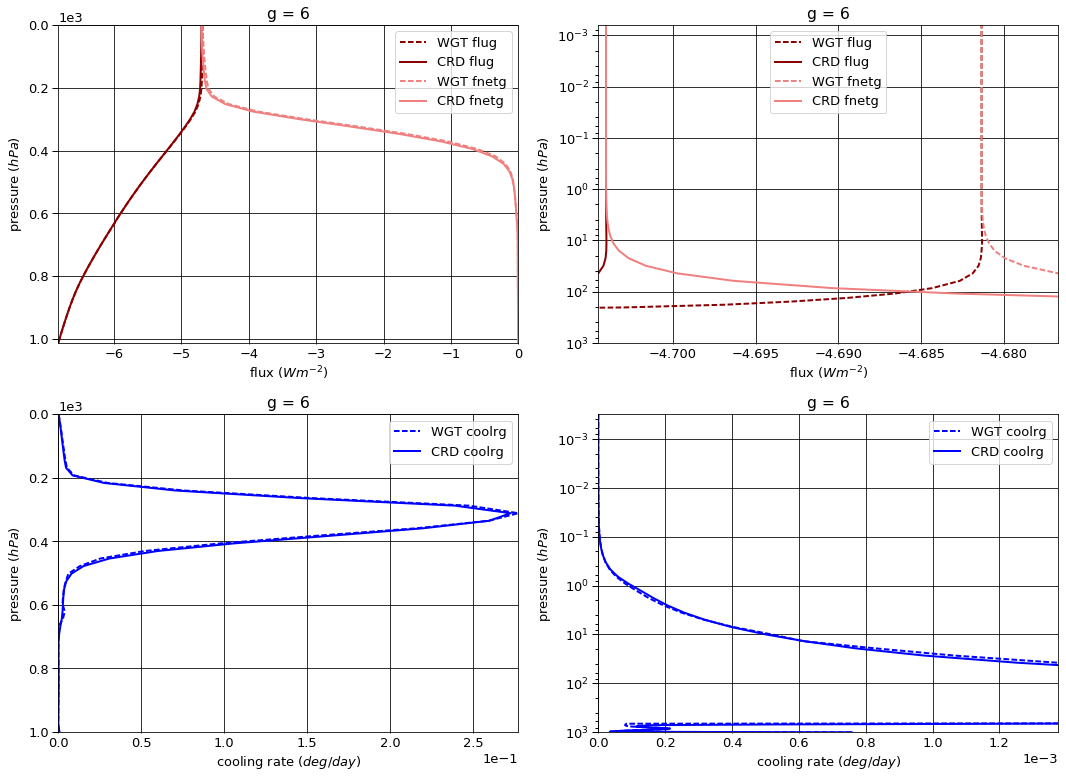

# Figure: flux, cooling rate g-group 7

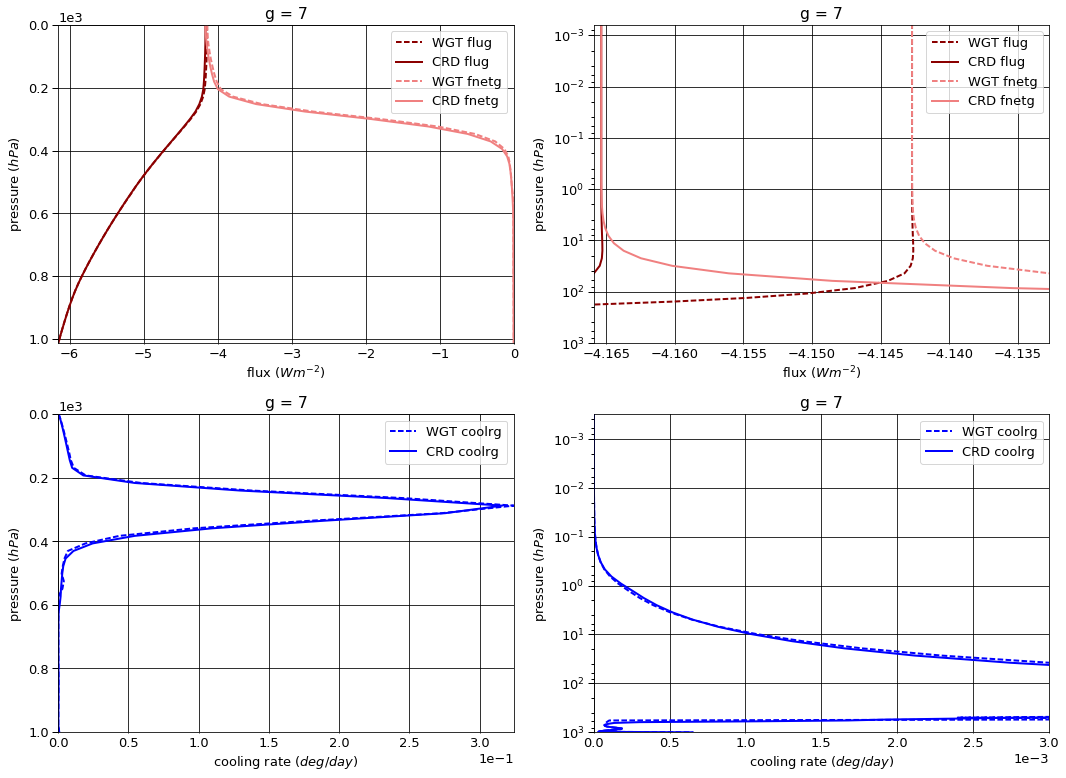

# Figure: flux, cooling rate g-group 8

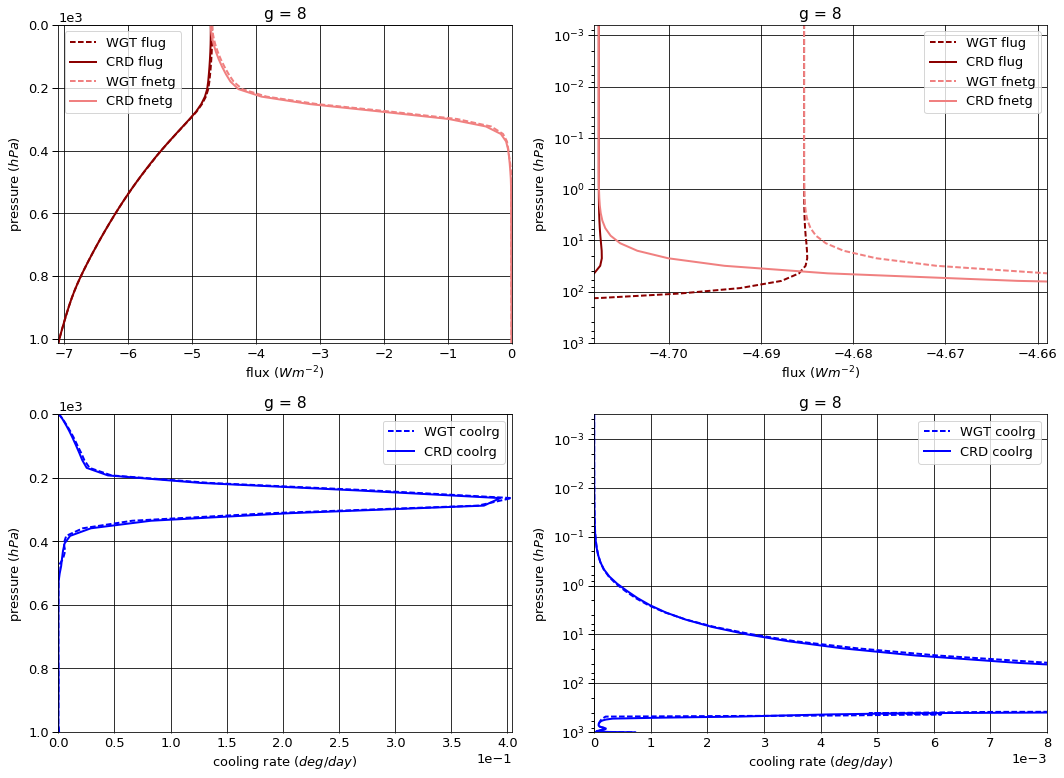

# Figure: flux, cooling rate g-group 9

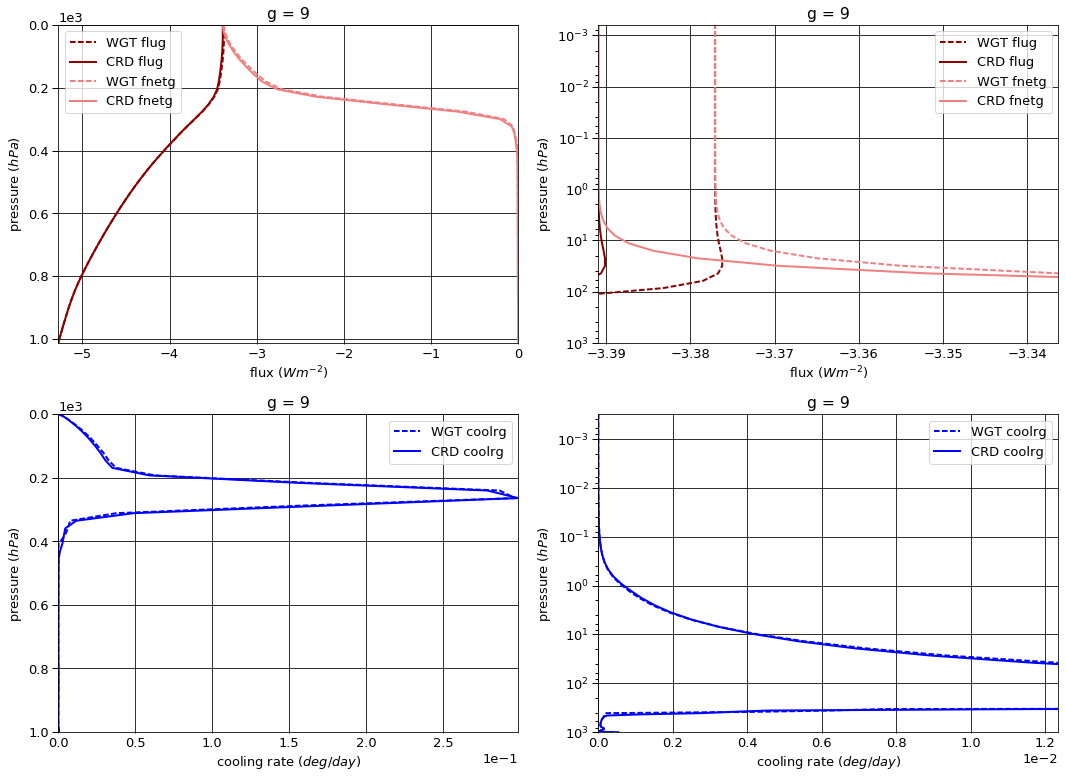

# Figure: flux, cooling rate g-group 10

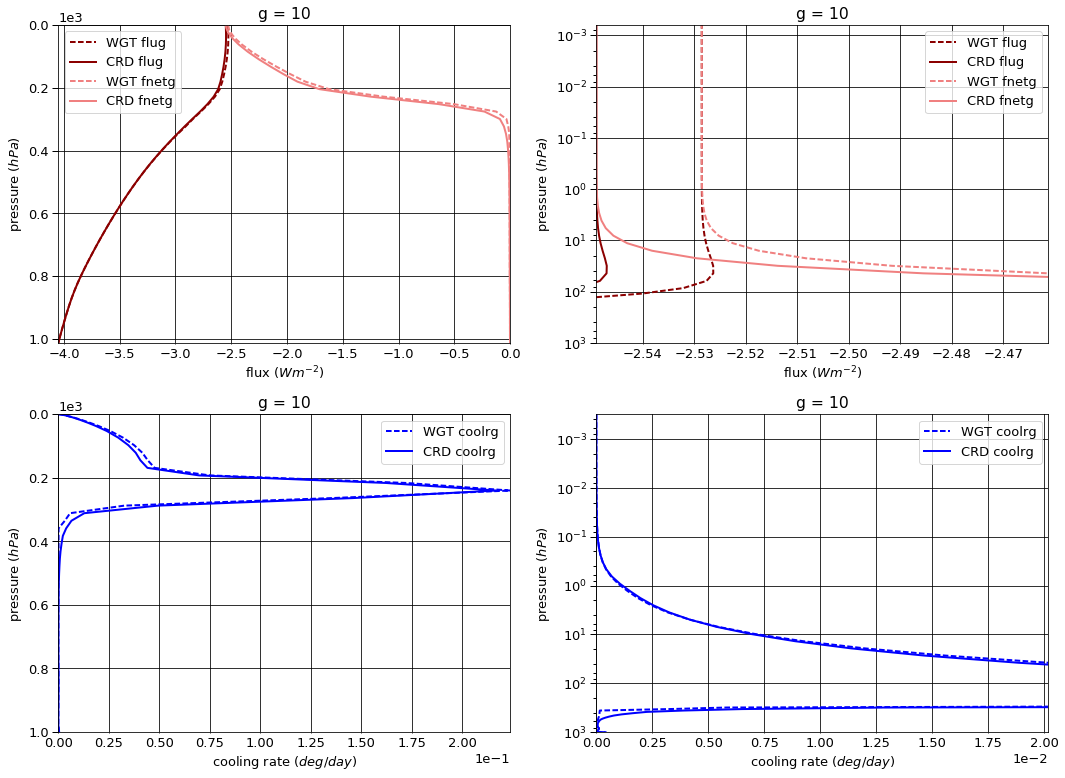

# Figure: flux, cooling rate g-group 11

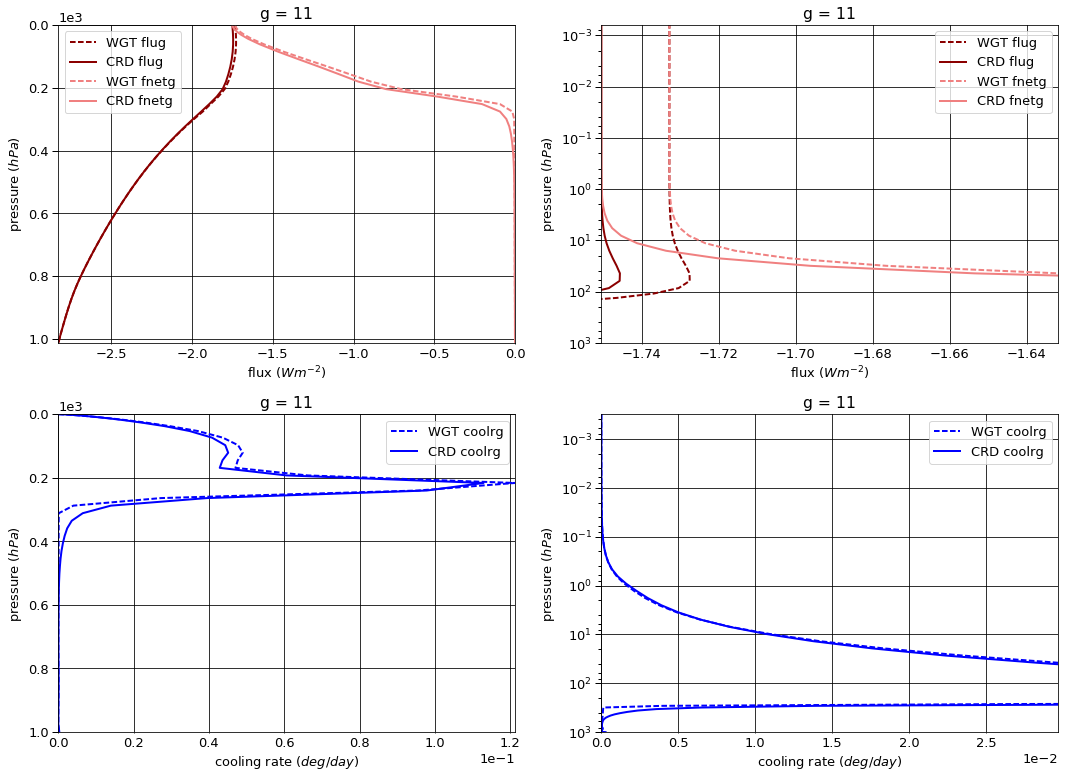

# Figure: flux, cooling rate g-group 12

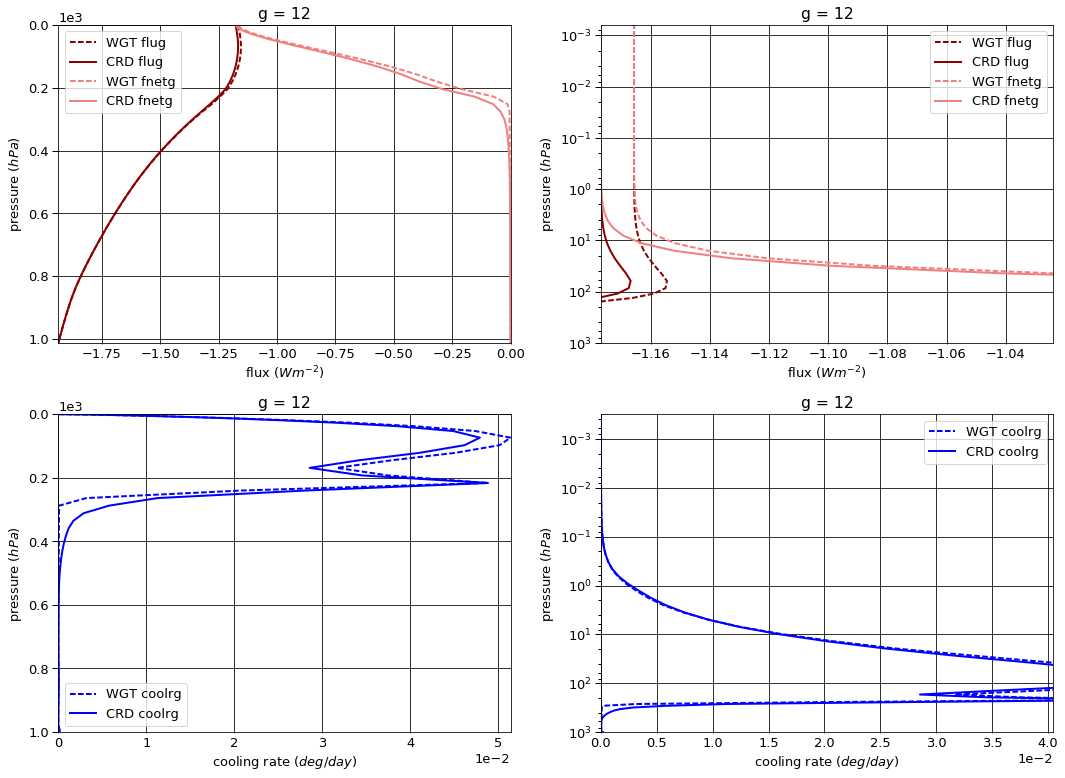

# Figure: flux, cooling rate g-group 13

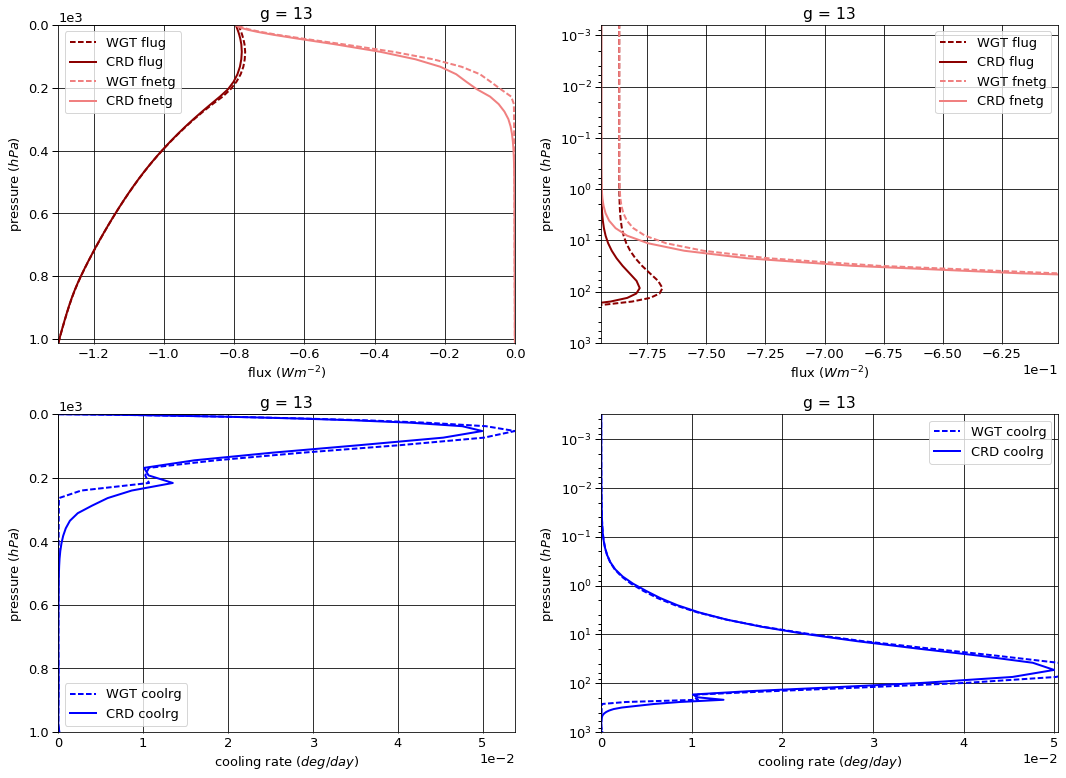

# Figure: flux, cooling rate g-group 14

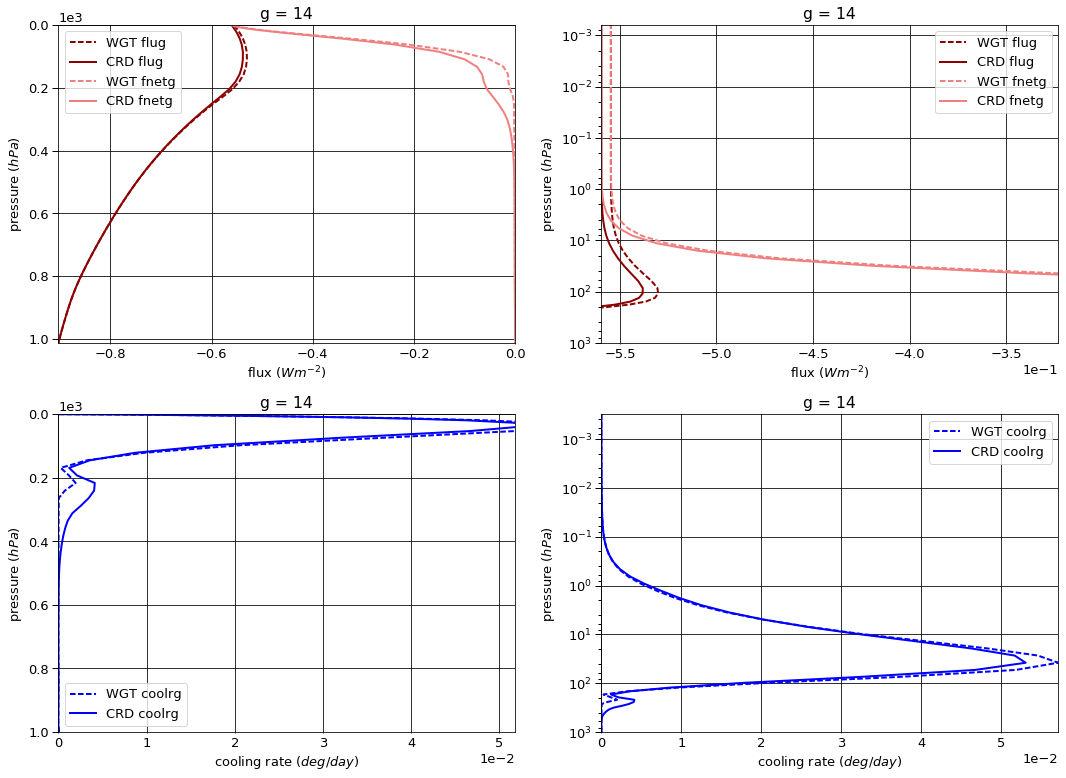

# Figure: flux, cooling rate g-group 15

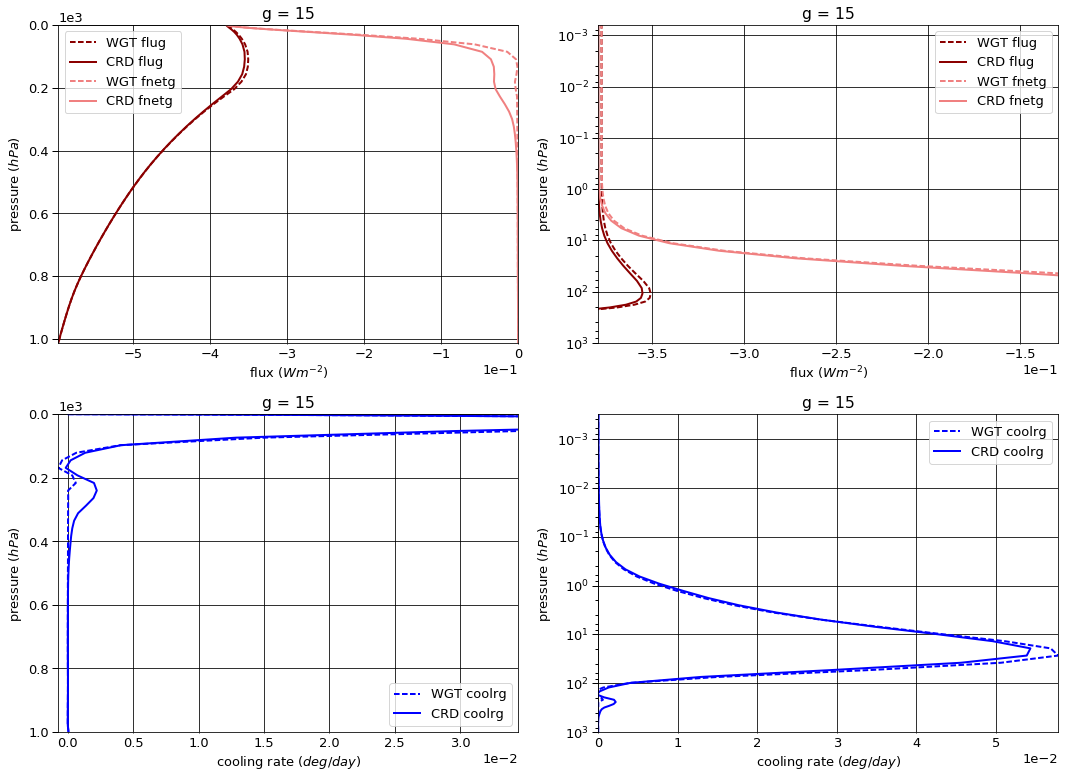

# Figure: flux, cooling rate g-group 16

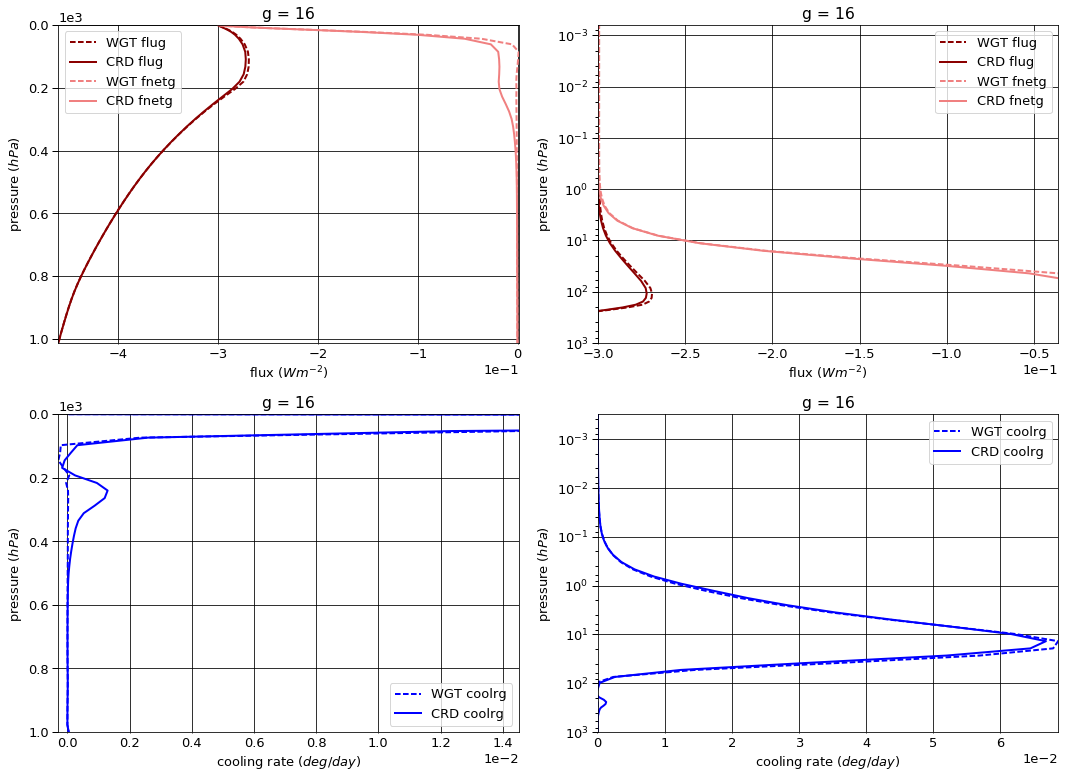

# Figure: flux, cooling rate g-group 17

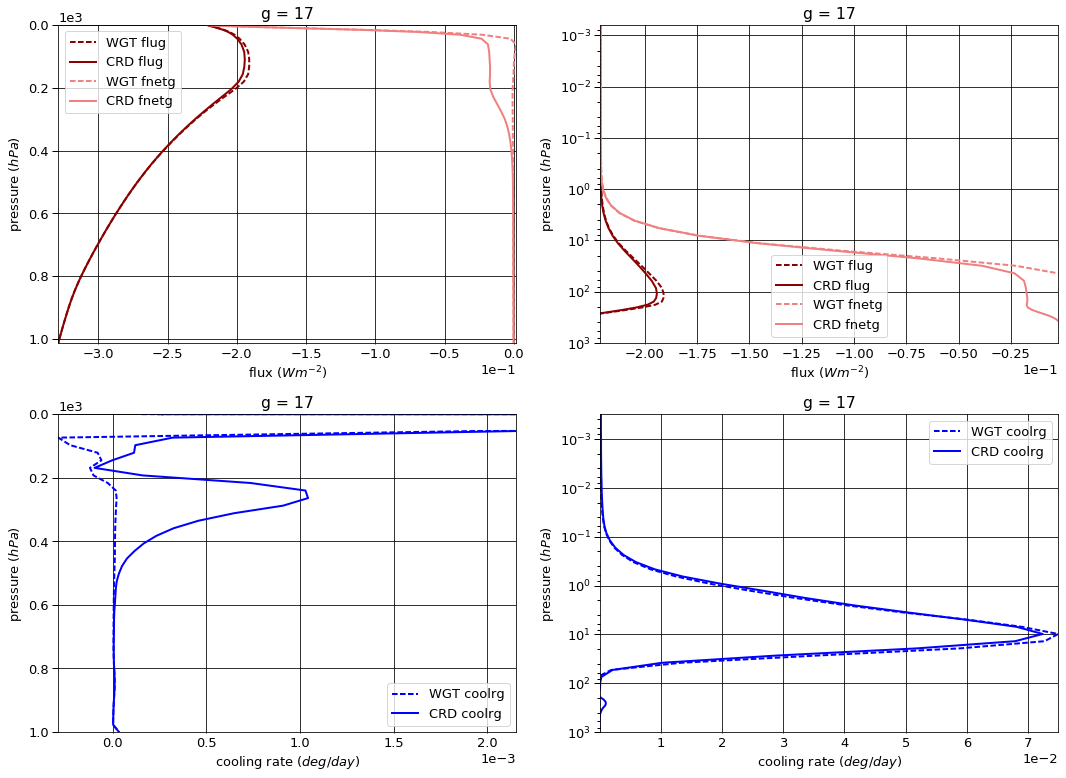

# Figure: flux, cooling rate g-group 18

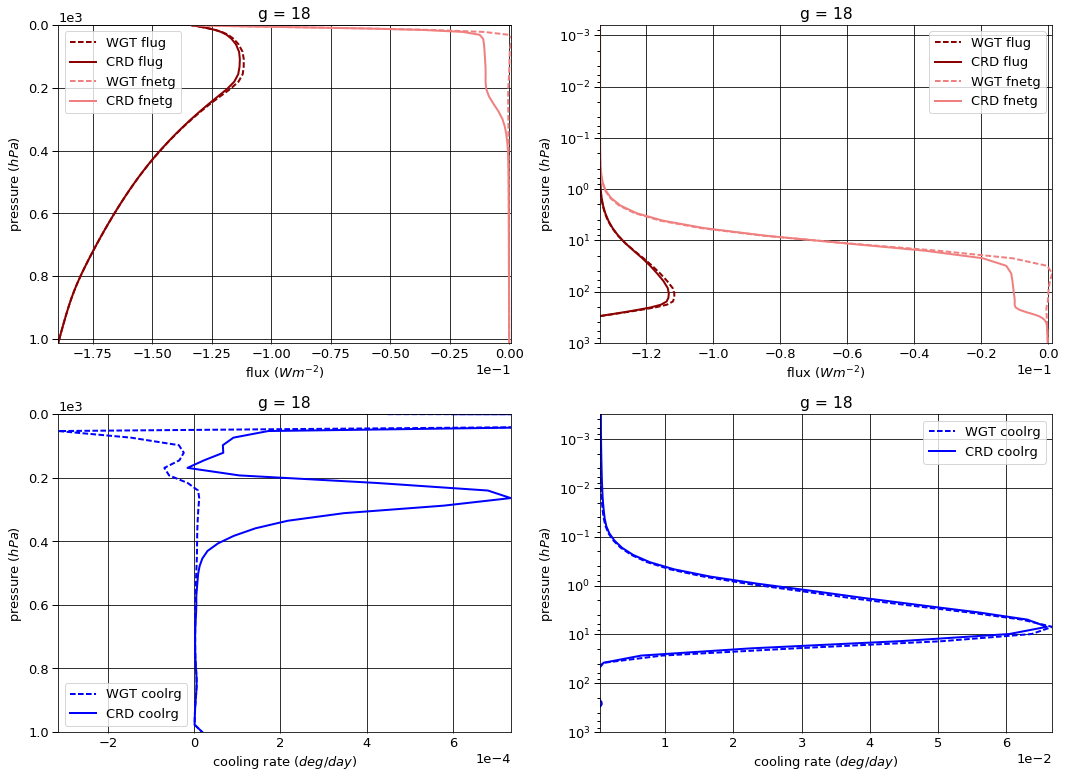

# Figure: flux, cooling rate g-group 19

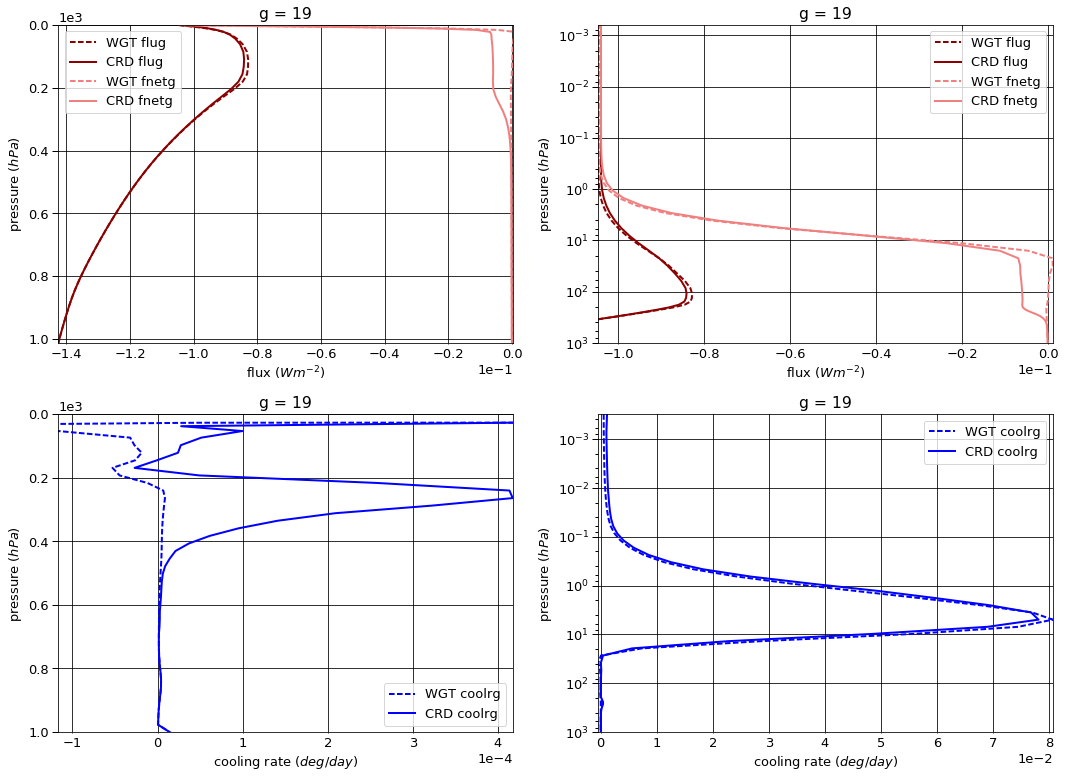

# Figure: flux, cooling rate g-group 20

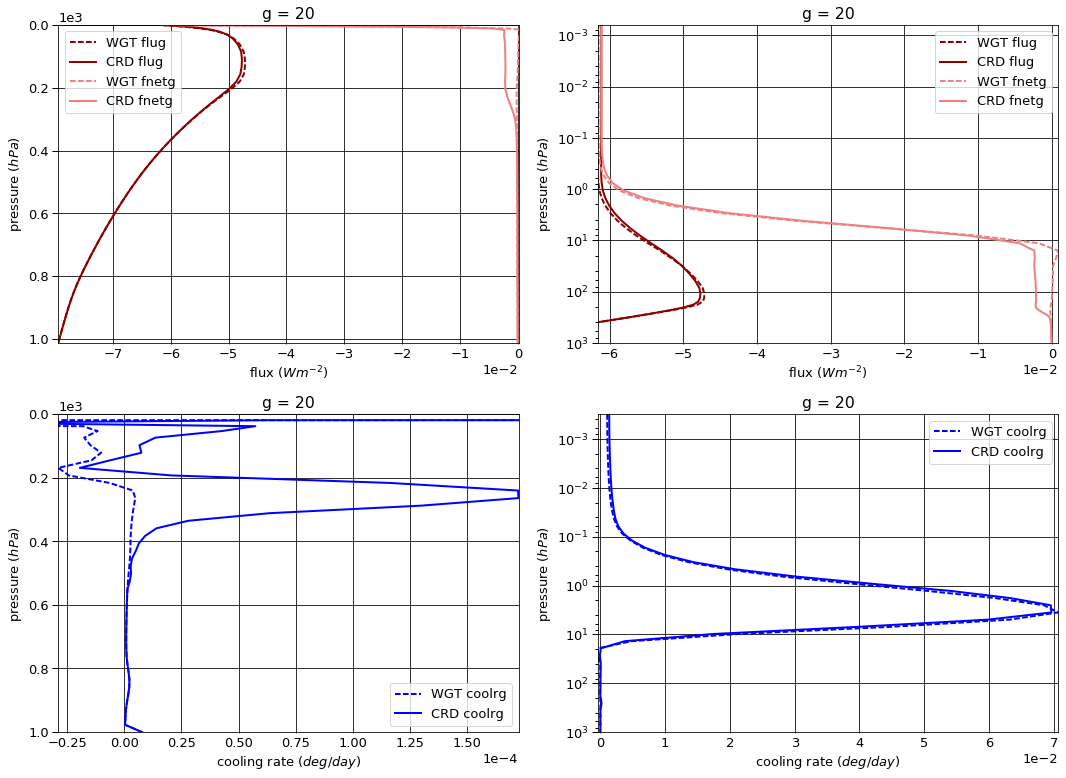

# Figure: flux, cooling rate g-group 21

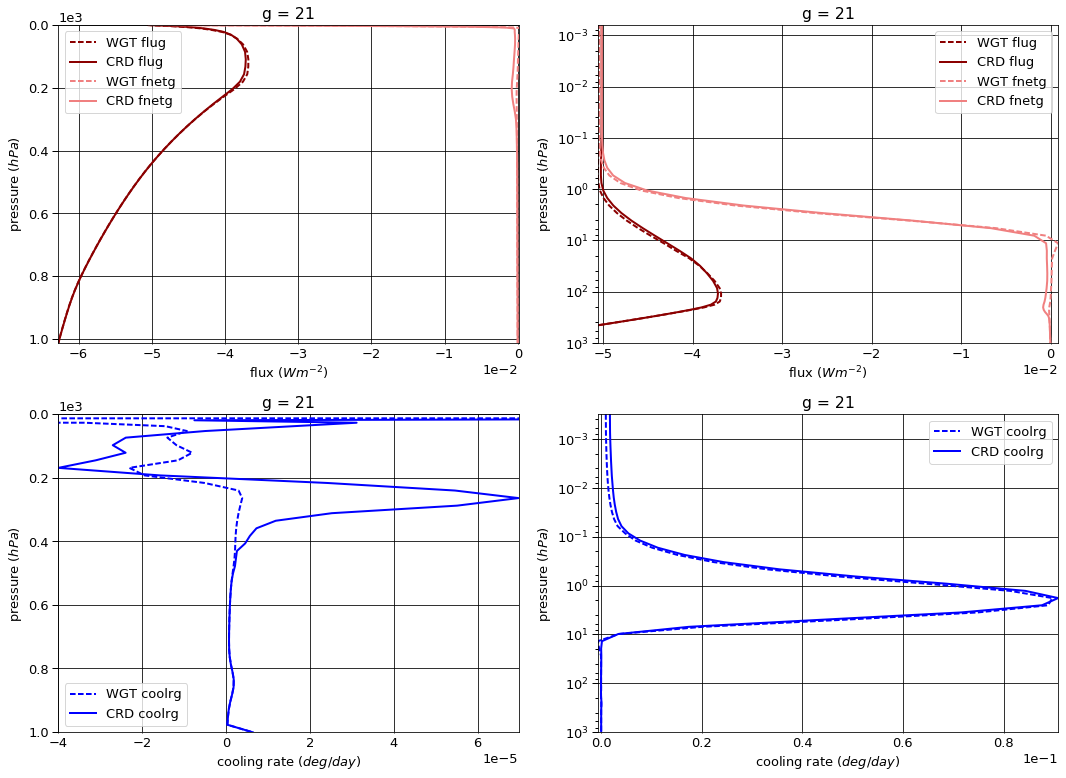

# Figure: flux, cooling rate g-group 22

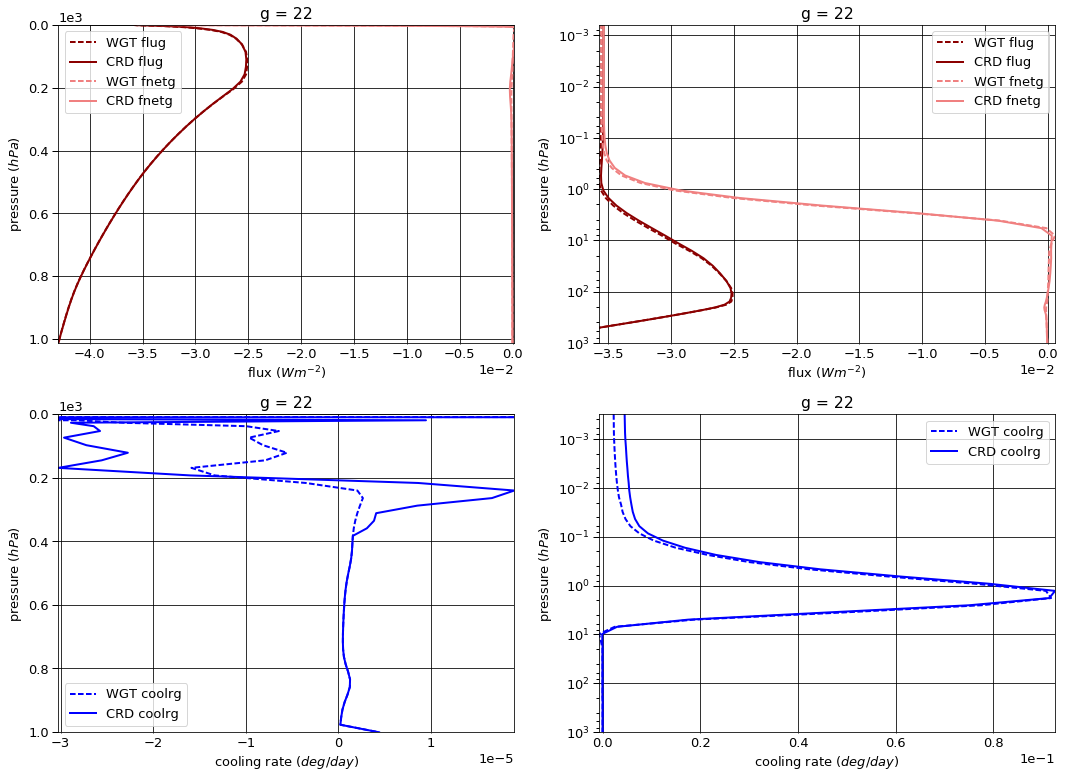

# Figure: flux, cooling rate g-group 23

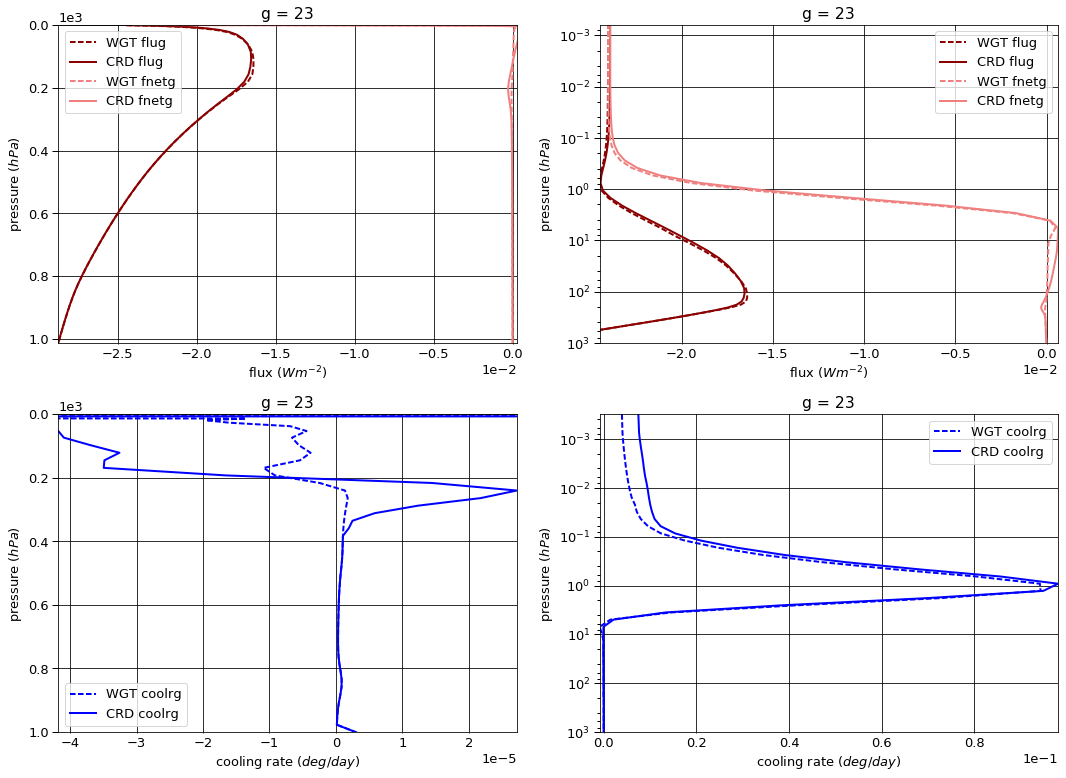

# Figure: flux, cooling rate g-group 24

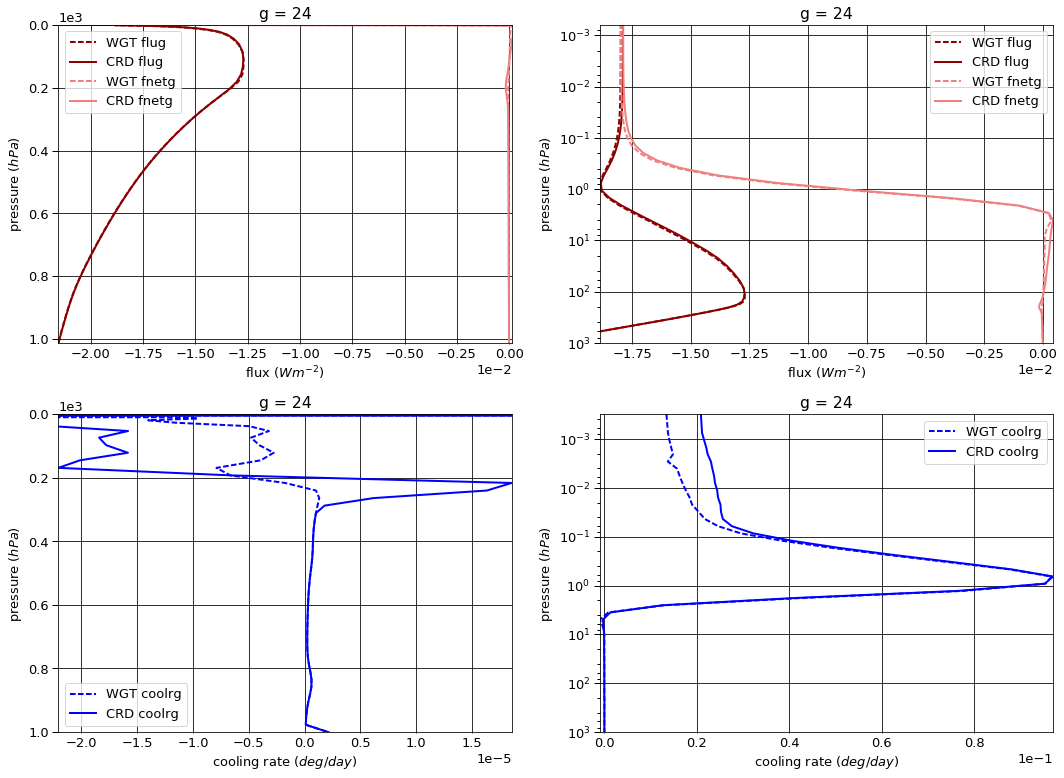

# Figure: flux, cooling rate g-group 25

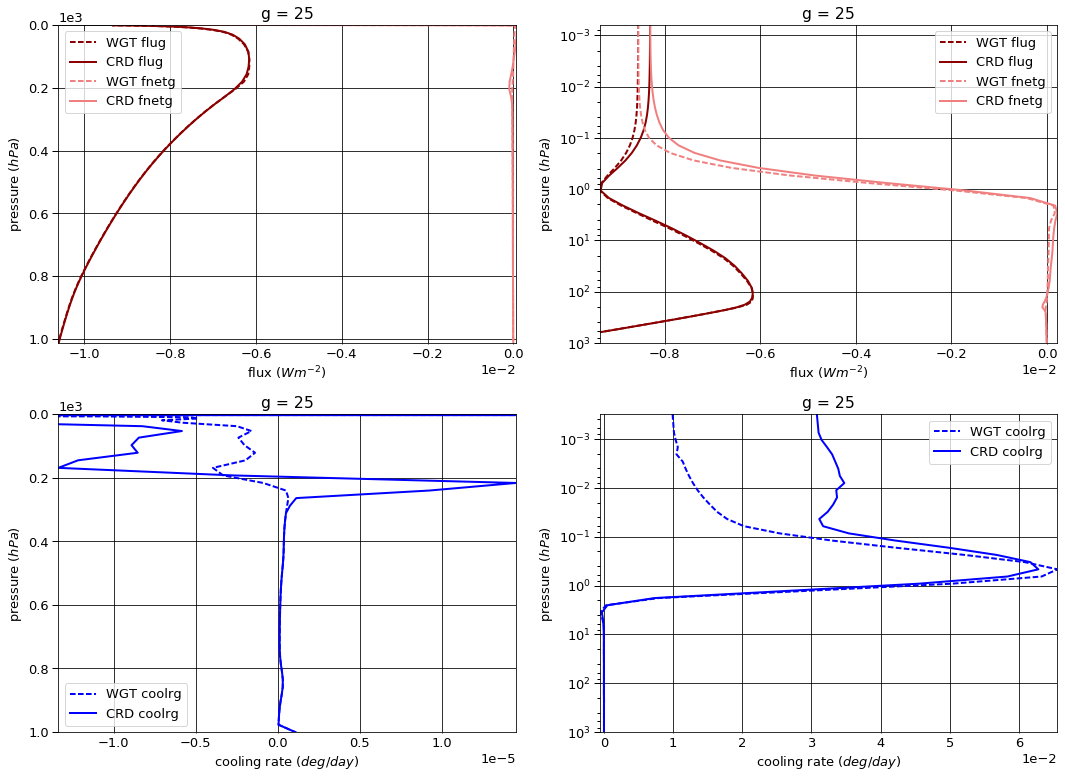

# Figure: flux, cooling rate g-group 26

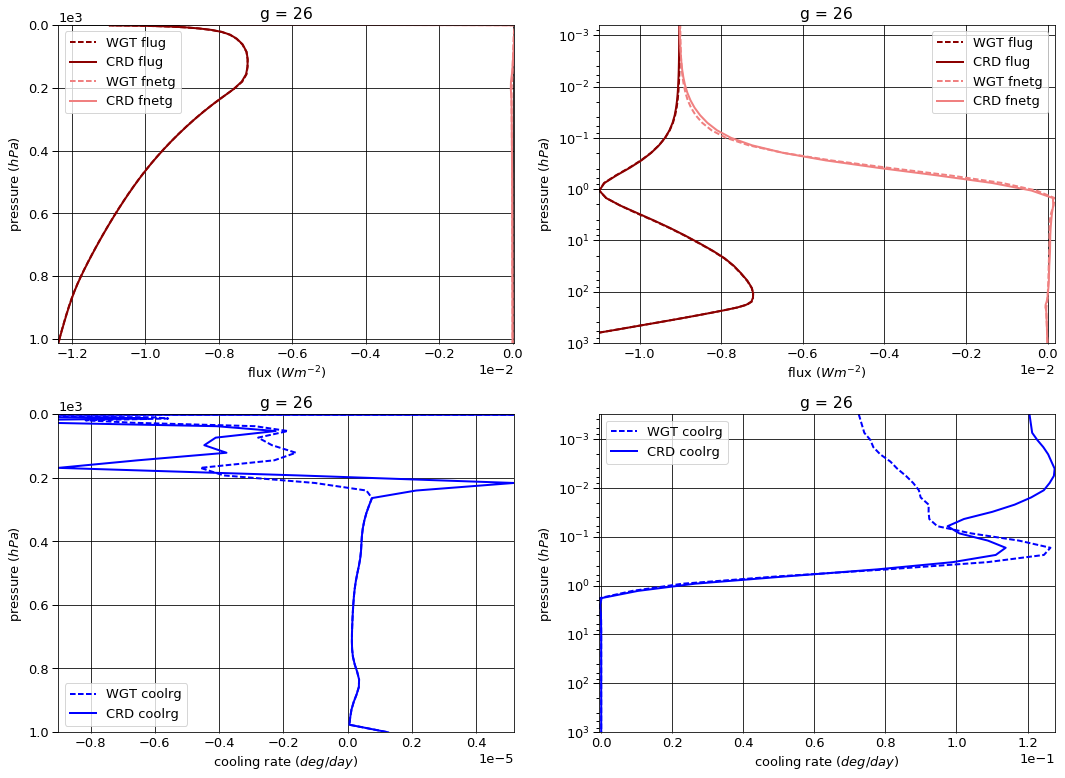

# Figure: flux, cooling rate g-group 27

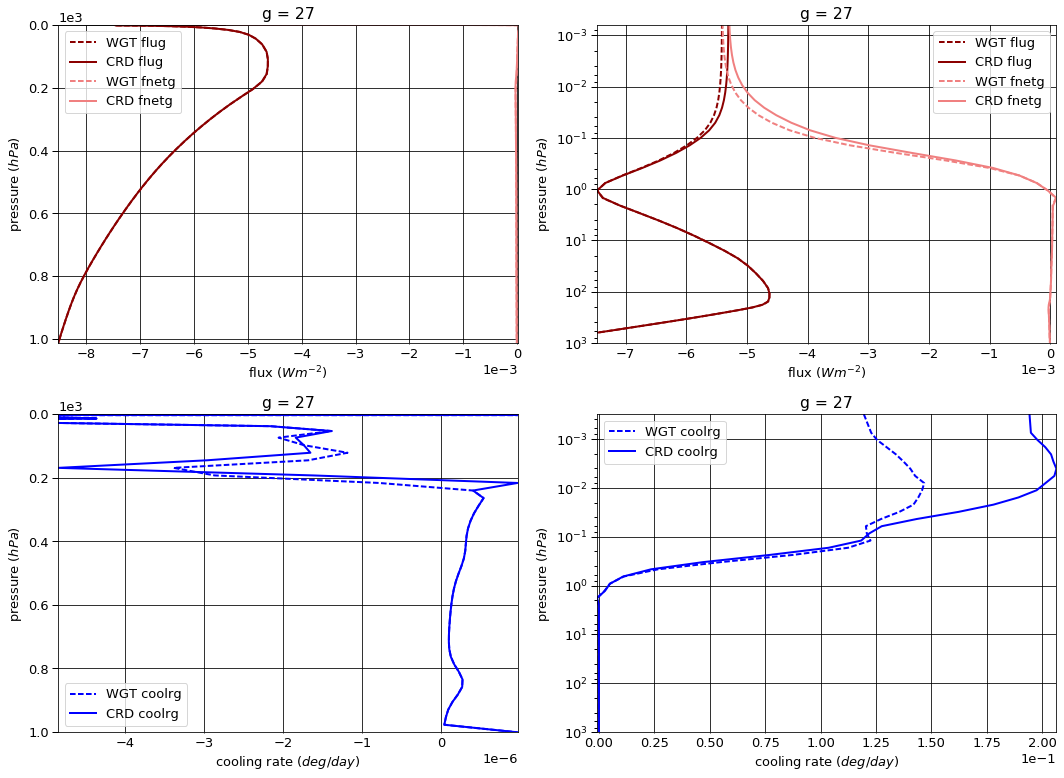

# Figure: flux, cooling rate g-group 28

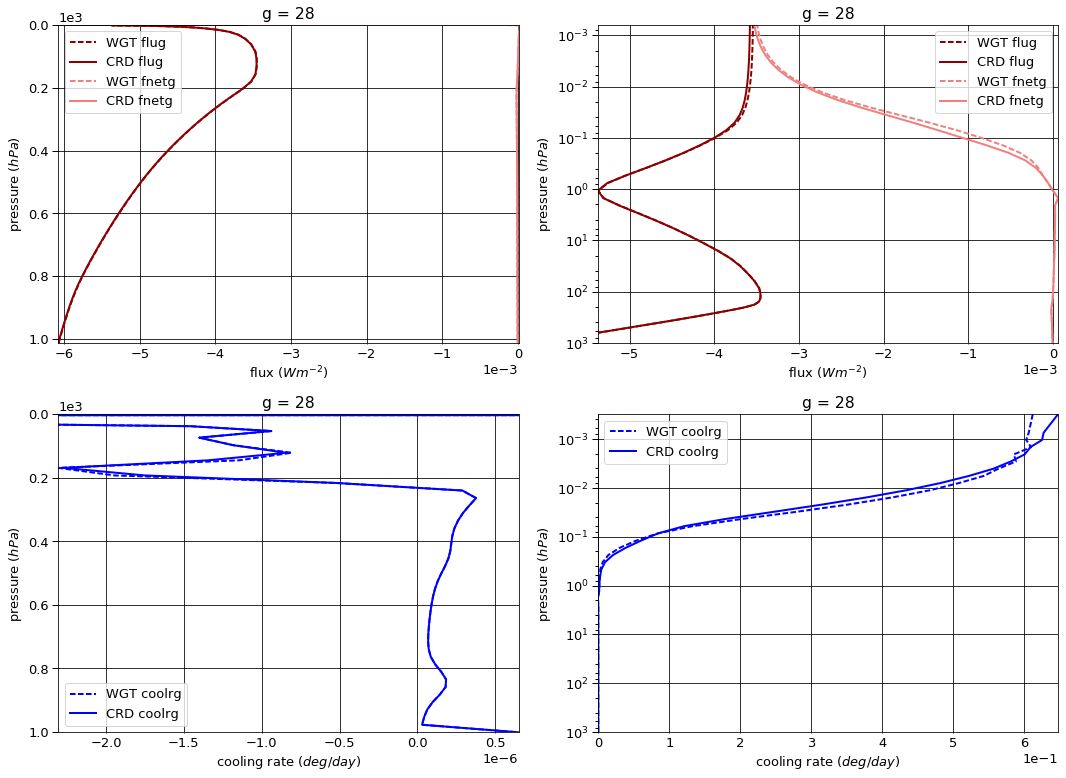

# Figure: flux, cooling rate g-group 29

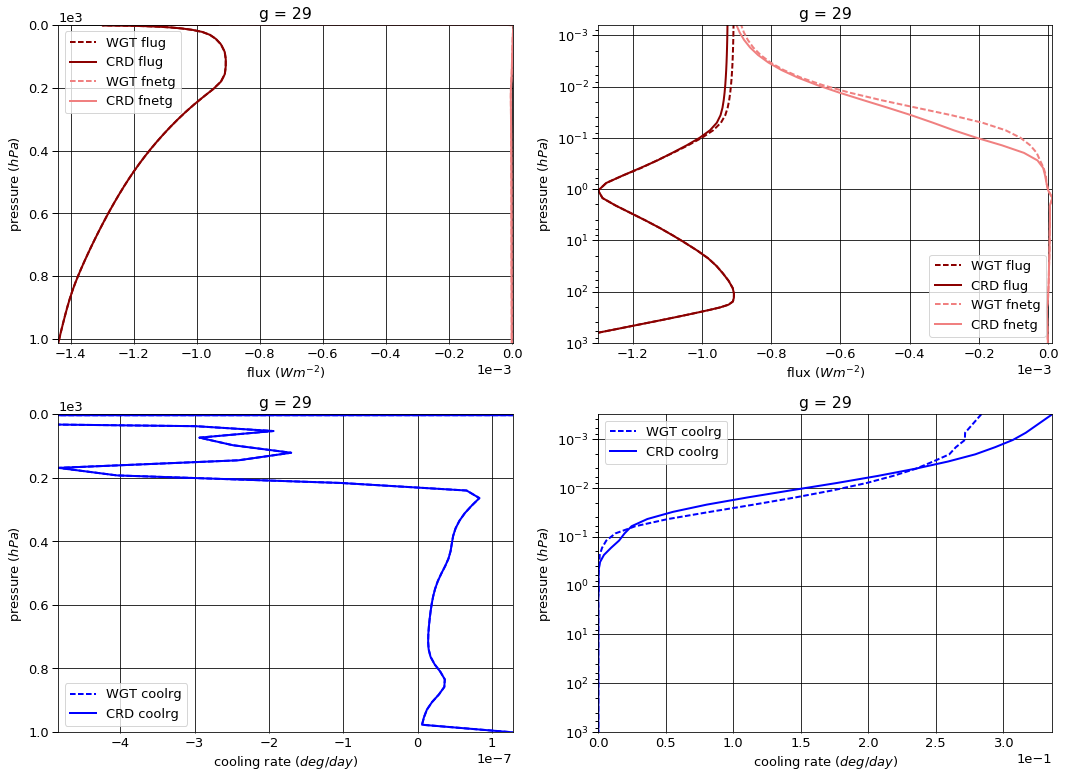

# Figure: flux, cooling rate g-group 30

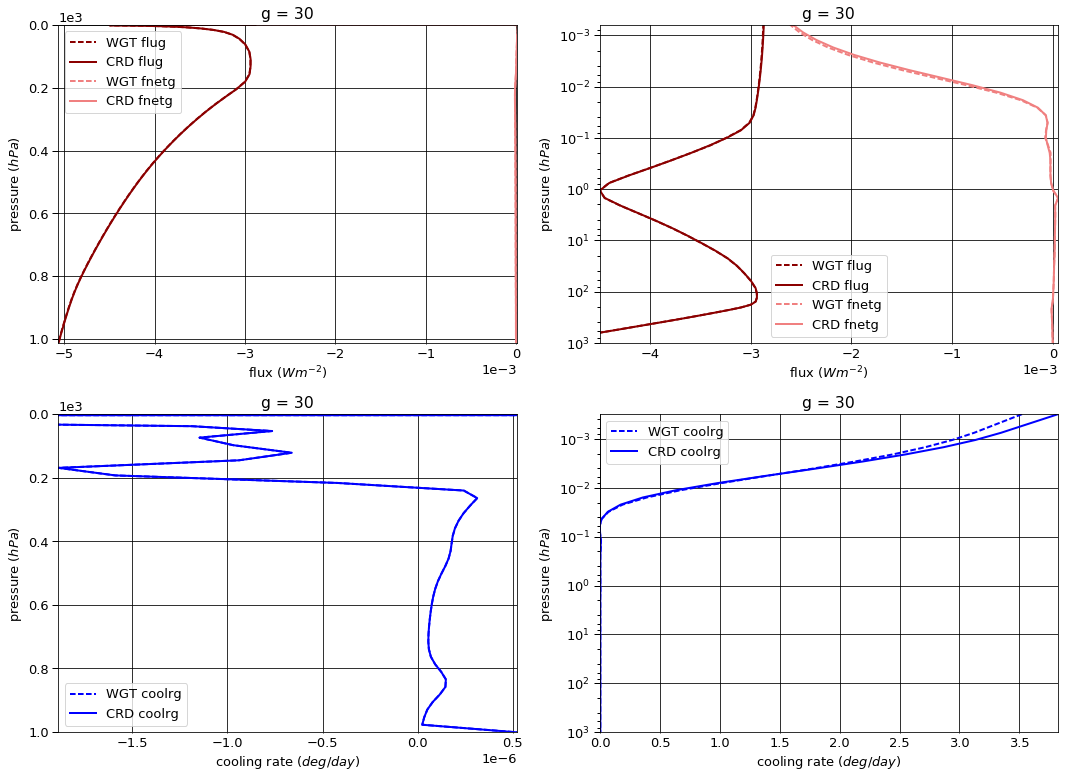

# Figure: flux, cooling rate g-group total

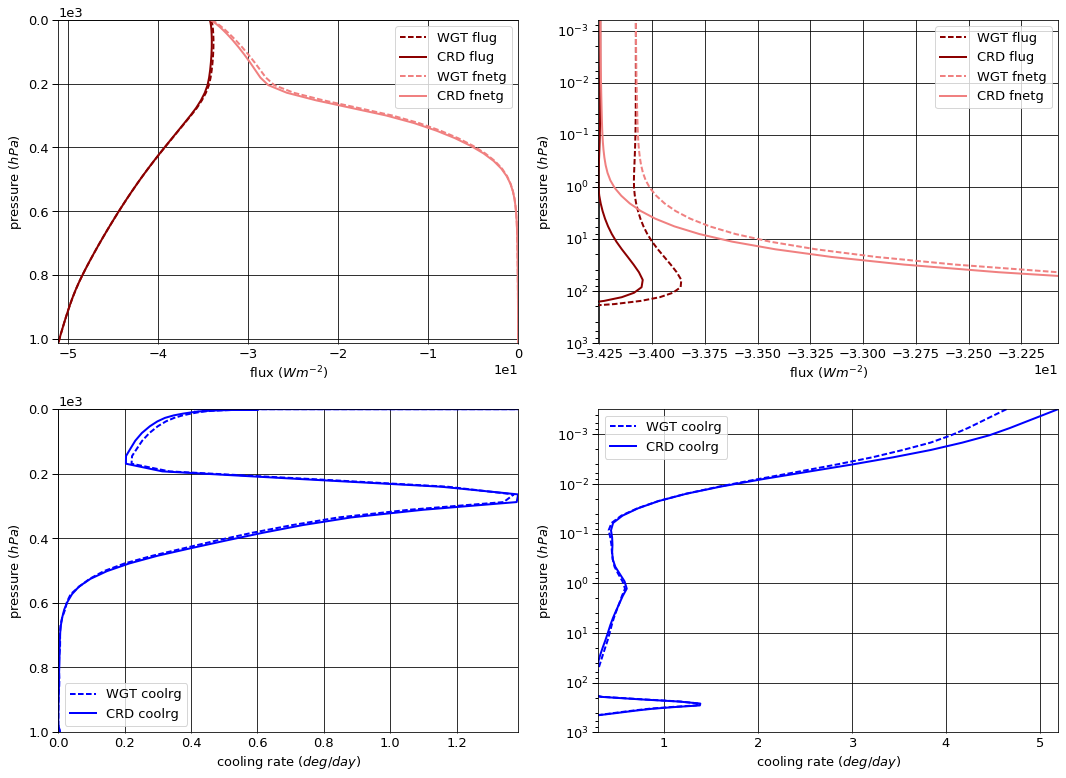

In [18]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [19]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1     -0.001021  0.000000 -1.020788e-03
   1013.0   76    -0.001110  0.001103 -7.248249e-06
2  0.0      1     -0.001968  0.000000 -1.967641e-03
   1013.0   76    -0.002204  0.002200 -3.551600e-06
3  0.0      1     -0.014383  0.000000 -1.438332e-02
   1013.0   76    -0.016741  0.016730 -1.112489e-05
4  0.0      1     -3.393883  0.000000 -3.393883e+00
   1013.0   76    -4.702365  4.700762 -1.603220e-03
5  0.0      1     -5.679063  0.000000 -5.679063e+00
   1013.0   76    -8.008606  8.006033 -2.572945e-03
6  0.0      1     -4.704050  0.000000 -4.704050e+00
   1013.0   76    -6.826244  6.824147 -2.097069e-03
7  0.0      1     -4.165361  0.000000 -4.165361e+00
   1013.0   76    -6.151436  6.149634 -1.802310e-03
8  0.0      1     -4.707599  0.000000 -4.707599e+00
   1013.0   76    -7.091387  7.089382 -2.004959e-03
9  0.0      1     -3.390935  0.000000 -3.390935e+00
   1013.0   76    -5.276400  5.274901 -1.499030e-03
10 0.0      1     -2.549043  0.000000 -2.549043e+00
   1013.0   76    -4.049974  4.048829 -1.144175e-03
11 0.0      1     -1.750422  0.000000 -1.750422e+00
   1013.0   76    -2.827201  2.826411 -7.903971e-04
12 0.0      1     -1.176835  0.000000 -1.176835e+00
   1013.0   76    -1.936199  1.935654 -5.454894e-04
13 0.0      1     -0.794401  0.000000 -7.944011e-01
   1013.0   76    -1.300473  1.300109 -3.644427e-04
14 0.0      1     -0.559630  0.000000 -5.596305e-01
   1013.0   76    -0.902909  0.902655 -2.537088e-04
15 0.0      1     -0.379168  0.000000 -3.791678e-01
   1013.0   76    -0.597267  0.597100 -1.674136e-04
16 0.0      1     -0.300117  0.000000 -3.001172e-01
   1013.0   76    -0.459653  0.459523 -1.294364e-04
17 0.0      1     -0.221304  0.000000 -2.213036e-01
   1013.0   76    -0.328921  0.328828 -9.378627e-05
18 0.0      1     -0.133784  0.000000 -1.337841e-01
   1013.0   76    -0.189518  0.189465 -5.284575e-05
19 0.0      1     -0.104065  0.000000 -1.040654e-01
   1013.0   76    -0.142477  0.142436 -4.052088e-05
20 0.0      1     -0.061135  0.000000 -6.113481e-02
   1013.0   76    -0.079404  0.079383 -2.180228e-05
21 0.0      1     -0.050150  0.000000 -5.015033e-02
   1013.0   76    -0.062744  0.062726 -1.760265e-05
22 0.0      1     -0.035393  0.000000 -3.539297e-02
   1013.0   76    -0.042958  0.042946 -1.212542e-05
23 0.0      1     -0.023914  0.000000 -2.391395e-02
   1013.0   76    -0.028745  0.028737 -8.433512e-06
24 0.0      1     -0.017881  0.000000 -1.788067e-02
   1013.0   76    -0.021539  0.021533 -5.995305e-06
25 0.0      1     -0.008305  0.000000 -8.305133e-03
   1013.0   76    -0.010597  0.010594 -3.029511e-06
26 0.0      1     -0.009026  0.000000 -9.025737e-03
   1013.0   76    -0.012368  0.012364 -3.495829e-06
27 0.0      1     -0.005303  0.000000 -5.303407e-03
   1013.0   76    -0.008522  0.008519 -2.693543e-06
28 0.0      1     -0.003576  0.000000 -3.575583e-03
   1013.0   76    -0.006076  0.006075 -1.795553e-06
29 0.0      1     -0.000926  0.000000 -9.256540e-04
   1013.0   76    -0.001439  0.001439 -3.533059e-07
30 0.0      1     -0.002863  0.000000 -2.863082e-03
   1013.0   76    -0.005062  0.005060 -1.442052e-06


WGT


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1     -0.000996  0.000000 -9.960536e-04
   1013.0   76    -0.001083  0.001079 -4.399689e-06
2  0.0      1     -0.001963  0.000000 -1.963383e-03
   1013.0   76    -0.002198  0.002194 -3.498705e-06
3  0.0      1     -0.014380  0.000000 -1.438026e-02
   1013.0   76    -0.016710  0.016699 -1.149509e-05
4  0.0      1     -3.393764  0.000000 -3.393764e+00
   1013.0   76    -4.702359  4.700762 -1.597328e-03
5  0.0      1     -5.654659  0.000000 -5.654659e+00
   1013.0   76    -8.008526  8.005953 -2.572750e-03
6  0.0      1     -4.681353  0.000000 -4.681353e+00
   1013.0   76    -6.826098  6.824001 -2.096914e-03
7  0.0      1     -4.142717  0.000000 -4.142717e+00
   1013.0   76    -6.152089  6.150287 -1.802595e-03
8  0.0      1     -4.685335  0.000000 -4.685335e+00
   1013.0   76    -7.090998  7.088993 -2.004855e-03
9  0.0      1     -3.377069  0.000000 -3.377069e+00
   1013.0   76    -5.276868  5.275369 -1.499188e-03
10 0.0      1     -2.528570  0.000000 -2.528570e+00
   1013.0   76    -4.050034  4.048890 -1.144191e-03
11 0.0      1     -1.732756  0.000000 -1.732756e+00
   1013.0   76    -2.827410  2.826619 -7.904304e-04
12 0.0      1     -1.165632  0.000000 -1.165632e+00
   1013.0   76    -1.935807  1.935262 -5.453214e-04
13 0.0      1     -0.786795  0.000000 -7.867953e-01
   1013.0   76    -1.300175  1.299811 -3.643275e-04
14 0.0      1     -0.554701  0.000000 -5.547007e-01
   1013.0   76    -0.902785  0.902531 -2.536629e-04
15 0.0      1     -0.377384  0.000000 -3.773836e-01
   1013.0   76    -0.597266  0.597098 -1.674107e-04
16 0.0      1     -0.299384  0.000000 -2.993836e-01
   1013.0   76    -0.459728  0.459598 -1.294644e-04
17 0.0      1     -0.221012  0.000000 -2.210122e-01
   1013.0   76    -0.328932  0.328838 -9.379343e-05
18 0.0      1     -0.133831  0.000000 -1.338307e-01
   1013.0   76    -0.189504  0.189451 -5.284552e-05
19 0.0      1     -0.104667  0.000000 -1.046672e-01
   1013.0   76    -0.142479  0.142439 -4.052438e-05
20 0.0      1     -0.061551  0.000000 -6.155107e-02
   1013.0   76    -0.079423  0.079402 -2.181133e-05
21 0.0      1     -0.050471  0.000000 -5.047139e-02
   1013.0   76    -0.062760  0.062742 -1.761025e-05
22 0.0      1     -0.035555  0.000000 -3.555464e-02
   1013.0   76    -0.042972  0.042960 -1.213227e-05
23 0.0      1     -0.024028  0.000000 -2.402809e-02
   1013.0   76    -0.028740  0.028731 -8.431829e-06
24 0.0      1     -0.017978  0.000000 -1.797795e-02
   1013.0   76    -0.021554  0.021548 -6.000919e-06
25 0.0      1     -0.008556  0.000000 -8.555990e-03
   1013.0   76    -0.010606  0.010603 -3.032720e-06
26 0.0      1     -0.009009  0.000000 -9.009094e-03
   1013.0   76    -0.012372  0.012368 -3.497076e-06
27 0.0      1     -0.005409  0.000000 -5.409461e-03
   1013.0   76    -0.008521  0.008518 -2.693175e-06
28 0.0      1     -0.003540  0.000000 -3.540024e-03
   1013.0   76    -0.006072  0.006070 -1.793953e-06
29 0.0      1     -0.000908  0.000000 -9.081570e-04
   1013.0   76    -0.001439  0.001439 -3.534448e-07
30 0.0      1     -0.002868  0.000000 -2.868085e-03
   1013.0   76    -0.005065  0.005064 -1.443094e-06


WGT - CRD


flug          fldg         fnetg
g  pressure level                                          
1  0.0      1      2.473477e-05  0.000000e+00  2.473477e-05
   1013.0   76     2.684650e-05 -2.399790e-05  2.848560e-06
2  0.0      1      4.258700e-06  0.000000e+00  4.258700e-06
   1013.0   76     5.785100e-06 -5.732200e-06  5.289510e-08
3  0.0      1      3.060000e-06  0.000000e+00  3.060000e-06
   1013.0   76     3.041500e-05 -3.078500e-05 -3.702040e-07
4  0.0      1      1.189000e-04  0.000000e+00  1.189000e-04
   1013.0   76     6.000000e-06  0.000000e+00  5.892000e-06
5  0.0      1      2.440340e-02  0.000000e+00  2.440340e-02
   1013.0   76     7.980000e-05 -7.960000e-05  1.958000e-07
6  0.0      1      2.269670e-02  0.000000e+00  2.269670e-02
   1013.0   76     1.462000e-04 -1.461000e-04  1.552000e-07
7  0.0      1      2.264450e-02  0.000000e+00  2.264450e-02
   1013.0   76    -6.527000e-04  6.526000e-04 -2.850000e-07
8  0.0      1      2.226380e-02  0.000000e+00  2.226380e-02
   1013.0   76     3.881000e-04 -3.881000e-04  1.044000e-07
9  0.0      1      1.386590e-02  0.000000e+00  1.386590e-02
   1013.0   76    -4.685000e-04  4.684000e-04 -1.588000e-07
10 0.0      1      2.047300e-02  0.000000e+00  2.047300e-02
   1013.0   76    -6.050000e-05  6.050000e-05 -1.540000e-08
11 0.0      1      1.766600e-02  0.000000e+00  1.766600e-02
   1013.0   76    -2.086000e-04  2.085000e-04 -3.333000e-08
12 0.0      1      1.120330e-02  0.000000e+00  1.120330e-02
   1013.0   76     3.922000e-04 -3.920000e-04  1.680400e-07
13 0.0      1      7.605810e-03  0.000000e+00  7.605810e-03
   1013.0   76     2.976000e-04 -2.975000e-04  1.151500e-07
14 0.0      1      4.929770e-03  0.000000e+00  4.929770e-03
   1013.0   76     1.236100e-04 -1.235600e-04  4.589000e-08
15 0.0      1      1.784200e-03  0.000000e+00  1.784200e-03
   1013.0   76     1.460000e-06 -1.460000e-06  2.910000e-09
16 0.0      1      7.336100e-04  0.000000e+00  7.336100e-04
   1013.0   76    -7.501000e-05  7.498000e-05 -2.796000e-08
17 0.0      1      2.913900e-04  0.000000e+00  2.913900e-04
   1013.0   76    -1.071000e-05  1.071000e-05 -7.156000e-09
18 0.0      1     -4.653000e-05  0.000000e+00 -4.653000e-05
   1013.0   76     1.365000e-05 -1.365000e-05  2.230000e-10
19 0.0      1     -6.018800e-04  0.000000e+00 -6.018800e-04
   1013.0   76    -2.090000e-06  2.090000e-06 -3.499000e-09
20 0.0      1     -4.162640e-04  0.000000e+00 -4.162640e-04
   1013.0   76    -1.897300e-05  1.896400e-05 -9.048000e-09
21 0.0      1     -3.210590e-04  0.000000e+00 -3.210590e-04
   1013.0   76    -1.579600e-05  1.578900e-05 -7.601000e-09
22 0.0      1     -1.616650e-04  0.000000e+00 -1.616650e-04
   1013.0   76    -1.363900e-05  1.363300e-05 -6.848000e-09
23 0.0      1     -1.141360e-04  0.000000e+00 -1.141360e-04
   1013.0   76     5.700000e-06 -5.698000e-06  1.683300e-09
24 0.0      1     -9.728200e-05  0.000000e+00 -9.728200e-05
   1013.0   76    -1.453000e-05  1.452400e-05 -5.613900e-09
25 0.0      1     -2.508572e-04  0.000000e+00 -2.508572e-04
   1013.0   76    -8.496000e-06  8.494000e-06 -3.208700e-09
26 0.0      1      1.664330e-05  0.000000e+00  1.664330e-05
   1013.0   76    -4.350000e-06  4.349000e-06 -1.246400e-09
27 0.0      1     -1.060533e-04  0.000000e+00 -1.060533e-04
   1013.0   76     1.262800e-06 -1.262500e-06  3.683000e-10
28 0.0      1      3.555840e-05  0.000000e+00  3.555840e-05
   1013.0   76     4.744300e-06 -4.742700e-06  1.599700e-09
29 0.0      1      1.749697e-05  0.000000e+00  1.749697e-05
   1013.0   76    -8.600000e-08  8.580000e-08 -1.389000e-10
30 0.0      1     -5.002800e-06  0.000000e+00 -5.002800e-06
   1013.0   76    -3.105800e-06  3.104800e-06 -1.041200e-09

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1      8.208697e-14
   1001.112500 75     1.637266e-06
2  0.000312    1      2.873044e-13
   1001.112500 75     1.146025e-06
3  0.000312    1      8.827633e-10
   1001.112500 75     4.261127e-06
4  0.000312    1      1.660127e-08
   1001.112500 75     5.799001e-04
5  0.000312    1      5.748302e-08
   1001.112500 75     9.302300e-04
6  0.000312    1      5.361640e-08
   1001.112500 75     7.582388e-04
7  0.000312    1      1.635750e-07
   1001.112500 75     6.517254e-04
8  0.000312    1      1.132969e-07
   1001.112500 75     7.250651e-04
9  0.000312    1      1.014088e-07
   1001.112500 75     5.420984e-04
10 0.000312    1      9.508415e-07
   1001.112500 75     4.137740e-04
11 0.000312    1      2.242780e-06
   1001.112500 75     2.858393e-04
12 0.000312    1      5.393080e-06
   1001.112500 75     1.972687e-04
13 0.000312    1      1.353809e-05
   1001.112500 75     1.317968e-04
14 0.000312    1      2.039217e-05
   1001.112500 75     9.175046e-05
15 0.000312    1      5.084479e-05
   1001.112500 75     6.054352e-05
16 0.000312    1      6.849592e-05
   1001.112500 75     4.681109e-05
17 0.000312    1      2.405056e-04
   1001.112500 75     3.391557e-05
18 0.000312    1      5.982830e-04
   1001.112500 75     1.911122e-05
19 0.000312    1      1.126778e-03
   1001.112500 75     1.465355e-05
20 0.000312    1      1.361927e-03
   1001.112500 75     7.885004e-06
21 0.000312    1      1.737718e-03
   1001.112500 75     6.365826e-06
22 0.000312    1      4.517469e-03
   1001.112500 75     4.384995e-06
23 0.000312    1      7.493247e-03
   1001.112500 75     3.049579e-06
24 0.000312    1      2.087758e-02
   1001.112500 75     2.168190e-06
25 0.000312    1      3.078036e-02
   1001.112500 75     1.095530e-06
26 0.000312    1      1.205439e-01
   1001.112500 75     1.264232e-06
27 0.000312    1      1.942456e-01
   1001.112500 75     9.738194e-07
28 0.000312    1      6.482825e-01
   1001.112500 75     6.492562e-07
29 0.000312    1      3.366405e-01
   1001.112500 75     1.278065e-07
30 0.000312    1      3.824800e+00
   1001.112500 75     5.215011e-07


WGT


coolrg
g  pressure    layer              
1  0.000312    1      5.863355e-14
   1001.112500 75     1.773924e-06
2  0.000312    1      2.579876e-13
   1001.112500 75     1.145298e-06
3  0.000312    1      4.165797e-10
   1001.112500 75     4.399560e-06
4  0.000312    1      8.952077e-09
   1001.112500 75     5.774079e-04
5  0.000312    1      5.084251e-08
   1001.112500 75     9.301496e-04
6  0.000312    1      3.652880e-08
   1001.112500 75     7.581826e-04
7  0.000312    1      9.886311e-08
   1001.112500 75     6.518282e-04
8  0.000312    1      1.028978e-07
   1001.112500 75     7.250274e-04
9  0.000312    1      1.043929e-07
   1001.112500 75     5.421557e-04
10 0.000312    1      7.366461e-07
   1001.112500 75     4.137777e-04
11 0.000312    1      1.583734e-06
   1001.112500 75     2.858524e-04
12 0.000312    1      3.236137e-06
   1001.112500 75     1.972074e-04
13 0.000312    1      8.902054e-06
   1001.112500 75     1.317551e-04
14 0.000312    1      1.105901e-05
   1001.112500 75     9.173387e-05
15 0.000312    1      2.790217e-05
   1001.112500 75     6.054231e-05
16 0.000312    1      4.419089e-05
   1001.112500 75     4.681926e-05
17 0.000312    1      1.540577e-04
   1001.112500 75     3.391816e-05
18 0.000312    1      4.488361e-04
   1001.112500 75     1.911114e-05
19 0.000312    1      5.314432e-04
   1001.112500 75     1.465481e-05
20 0.000312    1      1.051909e-03
   1001.112500 75     7.888273e-06
21 0.000312    1      9.226486e-04
   1001.112500 75     6.368572e-06
22 0.000312    1      2.273964e-03
   1001.112500 75     4.387469e-06
23 0.000312    1      3.944634e-03
   1001.112500 75     3.048970e-06
24 0.000312    1      1.342701e-02
   1001.112500 75     2.170219e-06
25 0.000312    1      9.917647e-03
   1001.112500 75     1.096689e-06
26 0.000312    1      7.248388e-02
   1001.112500 75     1.264682e-06
27 0.000312    1      1.195277e-01
   1001.112500 75     9.736863e-07
28 0.000312    1      6.125289e-01
   1001.112500 75     6.486781e-07
29 0.000312    1      2.839933e-01
   1001.112500 75     1.278567e-07
30 0.000312    1      3.523003e+00
   1001.112500 75     5.218776e-07


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -2.345342e-14
   1001.112500 75     1.366576e-07
2  0.000312    1     -2.931678e-14
   1001.112500 75    -7.276000e-10
3  0.000312    1     -4.661836e-10
   1001.112500 75     1.384337e-07
4  0.000312    1     -7.649193e-09
   1001.112500 75    -2.492220e-06
5  0.000312    1     -6.640508e-09
   1001.112500 75    -8.044000e-08
6  0.000312    1     -1.708760e-08
   1001.112500 75    -5.622000e-08
7  0.000312    1     -6.471193e-08
   1001.112500 75     1.029000e-07
8  0.000312    1     -1.039906e-08
   1001.112500 75    -3.775000e-08
9  0.000312    1      2.984030e-09
   1001.112500 75     5.739000e-08
10 0.000312    1     -2.141954e-07
   1001.112500 75     3.690000e-09
11 0.000312    1     -6.590464e-07
   1001.112500 75     1.314000e-08
12 0.000312    1     -2.156943e-06
   1001.112500 75    -6.133000e-08
13 0.000312    1     -4.636031e-06
   1001.112500 75    -4.165000e-08
14 0.000312    1     -9.333160e-06
   1001.112500 75    -1.658700e-08
15 0.000312    1     -2.294261e-05
   1001.112500 75    -1.214000e-09
16 0.000312    1     -2.430503e-05
   1001.112500 75     8.162000e-09
17 0.000312    1     -8.644797e-05
   1001.112500 75     2.586000e-09
18 0.000312    1     -1.494469e-04
   1001.112500 75    -8.200000e-11
19 0.000312    1     -5.953345e-04
   1001.112500 75     1.264000e-09
20 0.000312    1     -3.100179e-04
   1001.112500 75     3.269300e-09
21 0.000312    1     -8.150693e-04
   1001.112500 75     2.745500e-09
22 0.000312    1     -2.243506e-03
   1001.112500 75     2.473800e-09
23 0.000312    1     -3.548614e-03
   1001.112500 75    -6.085000e-10
24 0.000312    1     -7.450574e-03
   1001.112500 75     2.028800e-09
25 0.000312    1     -2.086271e-02
   1001.112500 75     1.159600e-09
26 0.000312    1     -4.806000e-02
   1001.112500 75     4.509000e-10
27 0.000312    1     -7.471790e-02
   1001.112500 75    -1.331600e-10
28 0.000312    1     -3.575357e-02
   1001.112500 75    -5.780800e-10
29 0.000312    1     -5.264722e-02
   1001.112500 75     5.018000e-11
30 0.000312    1     -3.017971e-01
   1001.112500 75     3.764700e-10

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-34.245503,0.000000,-34.245503
1013.0,76,-51.090539,51.075277,-0.015262



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-34.076842,0.000000,-34.076842
1013.0,76,-51.090573,51.075319,-0.015254



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.168661,0.000000,0.168661
1013.0,76,-0.000034,0.000043,0.000009


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,5.193409
1001.112500,75,0.005518



WGT


,,coolrg
pressure,layer,
0.000312,1,4.644307
1001.112500,75,0.005516



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.549102
1001.112500,75,-0.000002


In [20]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.003727,0.000025
2,0.005409,0.000049
3,0.013136,0.000368
4,0.063500,0.088113
5,0.106894,0.152985
6,0.118652,0.132357
7,0.121727,0.121060
8,0.155818,0.141033
9,0.112394,0.104787


In [21]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,0.000000e+00
2,2.610843e-23
3,5.705625e-23
4,1.246883e-22
5,2.724885e-22
6,5.954849e-22
7,1.301347e-21
8,2.843909e-21
9,6.214958e-21


In [22]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')